In [1]:
import logging
from pyspark.sql import SparkSession

# Configuración del Logger
logging.basicConfig(level=logging.INFO)

class DataIngestor:
    def __init__(self, file_path):
        self.file_path = file_path
        self.logger = logging.getLogger(self.__class__.__name__)
        self.spark = self.start_spark_session()

    def start_spark_session(self):
        """Iniciar una sesión Spark."""
        self.logger.info("Iniciando sesión Spark")
        return SparkSession.builder.appName("IoT Intrusion Detection").getOrCreate()

    def read_data(self):
        """Leer datos desde un archivo CSV."""
        self.logger.info(f"Leyendo datos desde {self.file_path}")
        df = self.spark.read.csv(self.file_path, header=True, inferSchema=True)
        self.logger.info("Lectura del archivo completada")
        return df

In [2]:
# Uso de la clase
file_path = "/Users/adrianinfantes/Desktop/AIR/CollegeStudies/MachineLearningPath/Portfolio/BankProjects/FraudTransactionsDetection/data/Fraud.csv"
data_ingestor = DataIngestor(file_path)
bank_data = data_ingestor.read_data()

INFO:DataIngestor:Iniciando sesión Spark
24/01/21 00:45:37 WARN Utils: Your hostname, Adrians-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.1.39 instead (on interface en0)
24/01/21 00:45:37 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/21 00:45:38 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
INFO:DataIngestor:Leyendo datos desde /Users/adrianinfantes/Desktop/AIR/CollegeStudies/MachineLearningPath/Portfolio/BankProjects/FraudTransactionsDetection/data/Fraud.csv
INFO:DataIngestor:Lectura del archivo completada                                


In [3]:
bank_data.show(5)

+---------+-----------+-------+-------------+--------------+----------------+--------+---------+-------------+------+-------+
|     Date|   nameOrig| amount|oldbalanceOrg|newbalanceOrig|            City|    type|Card Type|     Exp Type|Gender|isFraud|
+---------+-----------+-------+-------------+--------------+----------------+--------+---------+-------------+------+-------+
|26-May-13|C2011200430|  242.0|        302.0|          60.0|Ahmedabad, India|TRANSFER|     Gold|         Food|     F|      1|
|26-Jul-12| C931301500| 7081.0|      46066.0|       38985.0|    Delhi, India|TRANSFER|     Gold|Entertainment|     M|      1|
|12-Apr-12| C963642457|16355.0|      30355.0|       14000.0|  Kolkata, India|TRANSFER|   Silver|         Fuel|     F|      1|
|28-Jan-12|C1439438217|20820.0|      39663.0|       18843.0|  Lucknow, India|TRANSFER|     Gold|         Food|     F|      1|
|16-Apr-14| C892940485| 6071.0|      35586.0|       29515.0|Bengaluru, India|TRANSFER|     Gold|         Fuel|     M| 

In [4]:
import pyspark.sql.functions as F


class DataExplorer:
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.logger = logging.getLogger(self.__class__.__name__)

    def show_info(self):
        """Muestra la información general del DataFrame."""
        try:
            self.logger.info("Obteniendo información general del DataFrame")
            self.dataframe.printSchema()
            self.logger.info("Información general obtenida con éxito")
        except Exception as e:
            self.logger.error(f"Error al obtener la información del DataFrame: {e}")

    def show_describe(self):
        """Muestra estadísticas descriptivas del DataFrame."""
        try:
            self.logger.info("Obteniendo estadísticas descriptivas del DataFrame")
            self.dataframe.describe().show()
            self.logger.info("Estadísticas descriptivas obtenidas con éxito")
        except Exception as e:
            self.logger.error(f"Error al obtener estadísticas descriptivas: {e}")

    def show_null_values(self):
        """Muestra el conteo de valores nulos en el DataFrame."""
        try:
            self.logger.info("Calculando valores nulos en el DataFrame")
            null_values = self.dataframe.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in self.dataframe.columns])
            null_values.show()
            self.logger.info("Valores nulos calculados con éxito")
        except Exception as e:
            self.logger.error(f"Error al calcular valores nulos: {e}")

In [5]:
# Uso de la clase
data_explorer = DataExplorer(bank_data)
data_explorer.show_info()
data_explorer.show_describe()
data_explorer.show_null_values()

INFO:DataExplorer:Obteniendo información general del DataFrame
INFO:DataExplorer:Información general obtenida con éxito
INFO:DataExplorer:Obteniendo estadísticas descriptivas del DataFrame


root
 |-- Date: string (nullable = true)
 |-- nameOrig: string (nullable = true)
 |-- amount: double (nullable = true)
 |-- oldbalanceOrg: double (nullable = true)
 |-- newbalanceOrig: double (nullable = true)
 |-- City: string (nullable = true)
 |-- type: string (nullable = true)
 |-- Card Type: string (nullable = true)
 |-- Exp Type: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- isFraud: integer (nullable = true)


24/01/21 00:46:02 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
INFO:DataExplorer:Estadísticas descriptivas obtenidas con éxito                 
INFO:DataExplorer:Calculando valores nulos en el DataFrame


+-------+---------+-----------+------------------+------------------+-----------------+----------------+--------+---------+--------+-------+-------------------+
|summary|     Date|   nameOrig|            amount|     oldbalanceOrg|   newbalanceOrig|            City|    type|Card Type|Exp Type| Gender|            isFraud|
+-------+---------+-----------+------------------+------------------+-----------------+----------------+--------+---------+--------+-------+-------------------+
|  count|  1048574|    1048574|           1048574|           1048574|          1048574|         1048574| 1048574|  1048574| 1048574|1048574|            1048574|
|   mean|     NULL|       NULL| 38027.67100427809| 880198.2874433202|842170.6164390347|            NULL|    NULL|     NULL|    NULL|   NULL|0.16764195946113483|
| stddev|     NULL|       NULL|110516.83136312648|2969967.5040379316|2936373.401143199|            NULL|    NULL|     NULL|    NULL|   NULL| 0.3735482110296879|
|    min|01-Apr-12|C1000001725|   

INFO:DataExplorer:Valores nulos calculados con éxito                            


+----+--------+------+-------------+--------------+----+----+---------+--------+------+-------+
|Date|nameOrig|amount|oldbalanceOrg|newbalanceOrig|City|type|Card Type|Exp Type|Gender|isFraud|
+----+--------+------+-------------+--------------+----+----+---------+--------+------+-------+
|   0|       0|     0|            0|             0|   0|   0|        0|       0|     0|      0|
+----+--------+------+-------------+--------------+----+----+---------+--------+------+-------+


In [6]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml import Pipeline
from pyspark.sql.functions import to_date, col

class DataTransformer:
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.logger = logging.getLogger(self.__class__.__name__)
        self.to_drop = []  # Inicialización del atributo to_drop

    def one_hot_encode(self, columns):
        """Aplica One-Hot Encoding a las columnas especificadas y elimina las columnas originales."""
        try:
            self.logger.info("Aplicando One-Hot Encoding")
            stages = []  # Etapas para el pipeline

            for col_name in columns:
                string_indexer = StringIndexer(inputCol=col_name, outputCol=col_name + "_indexed")
                encoder = OneHotEncoder(inputCols=[string_indexer.getOutputCol()], outputCols=[col_name + "_encoded"])
                stages += [string_indexer, encoder]
                self.to_drop.append(col_name)

            pipeline = Pipeline(stages=stages)
            model = pipeline.fit(self.dataframe)
            self.dataframe = model.transform(self.dataframe)

            self.dataframe = self.dataframe.drop(*self.to_drop)

            self.logger.info("One-Hot Encoding aplicado con éxito")
            return self.dataframe
        except Exception as e:
            self.logger.error(f"Error al aplicar One-Hot Encoding: {e}")
            raise

    def convert_to_date(self, column):
        """Convierte una columna a tipo fecha."""
        try:
            self.logger.info(f"Convirtiendo la columna {column} a tipo fecha")
            # Usando el formato 'dd-MMM-yy' para la conversión
            self.dataframe = self.dataframe.withColumn(column, to_date(col(column), 'dd-MMM-yy'))
            self.logger.info(f"Columna {column} convertida a tipo fecha con éxito")
            return self.dataframe
        except Exception as e:
            self.logger.error(f"Error al convertir la columna {column} a tipo fecha: {e}")
            raise

    def scale_features(self, input_cols):
        """Escala las características numéricas especificadas y elimina las columnas originales."""
        try:
            self.logger.info("Aplicando escalado a las características numéricas")
            assembler = VectorAssembler(inputCols=input_cols, outputCol="features_to_scale")
            scaler = StandardScaler(inputCol="features_to_scale", outputCol="scaled_features")

            self.dataframe = assembler.transform(self.dataframe)
            scaler_model = scaler.fit(self.dataframe)
            self.dataframe = scaler_model.transform(self.dataframe)

            self.dataframe = self.dataframe.drop("features_to_scale")

            self.logger.info("Escalado de características completado con éxito")
            return self.dataframe
        except Exception as e:
            self.logger.error(f"Error al aplicar el escalado de características: {e}")
            raise

In [7]:
# Uso de la clase
data_transformer = DataTransformer(bank_data)

# Aplicando One-Hot Encoding
columns_to_encode = ['type', 'Card Type', 'Exp Type', 'Gender']
transformed_data = data_transformer.one_hot_encode(columns_to_encode)

# Convirtiendo la columna 'Date' a tipo fecha
transformed_data = data_transformer.convert_to_date('Date')

# Escalando características numéricas
columns_to_scale = ['amount', 'oldbalanceOrg', 'newbalanceOrig']
transformed_data = data_transformer.scale_features(columns_to_scale)

INFO:DataTransformer:Aplicando One-Hot Encoding
INFO:DataTransformer:One-Hot Encoding aplicado con éxito                        
INFO:DataTransformer:Convirtiendo la columna Date a tipo fecha
INFO:DataTransformer:Columna Date convertida a tipo fecha con éxito
INFO:DataTransformer:Aplicando escalado a las características numéricas
INFO:DataTransformer:Escalado de características completado con éxito           


In [8]:
transformed_data.show(5)

+----------+-----------+-------+-------------+--------------+----------------+-------+------------+-------------+-----------------+-----------------+----------------+----------------+--------------+--------------+--------------------+
|      Date|   nameOrig| amount|oldbalanceOrg|newbalanceOrig|            City|isFraud|type_indexed| type_encoded|Card Type_indexed|Card Type_encoded|Exp Type_indexed|Exp Type_encoded|Gender_indexed|Gender_encoded|     scaled_features|
+----------+-----------+-------+-------------+--------------+----------------+-------+------------+-------------+-----------------+-----------------+----------------+----------------+--------------+--------------+--------------------+
|2013-05-26|C2011200430|  242.0|        302.0|          60.0|Ahmedabad, India|      1|         3.0|(4,[3],[1.0])|              3.0|    (5,[3],[1.0])|             0.0|   (8,[0],[1.0])|           0.0| (1,[0],[1.0])|[0.00218971171191...|
|2012-07-26| C931301500| 7081.0|      46066.0|       38985.0

In [9]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import DataFrame
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.sql.functions import col
from pyspark.sql.types import StringType
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml import Pipeline
from pyspark.sql.functions import rand

class Splitter:
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.logger = logging.getLogger(self.__class__.__name__)

    def select_features(self, feature_columns, label_column):
        """Selecciona las columnas de características y etiquetas para el modelo."""
        try:
            self.logger.info("Seleccionando características y etiqueta")
            # Asegurar que la columna de etiqueta es de tipo String para la indexación
            if isinstance(label_column, str):
                self.dataframe = self.dataframe.withColumn(label_column, col(label_column).cast(StringType()))

            # Usar VectorAssembler para combinar las columnas de características
            assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
            self.dataframe = assembler.transform(self.dataframe)

            # Indexar la columna de etiqueta
            label_indexer = StringIndexer(inputCol=label_column, outputCol="label")
            self.dataframe = label_indexer.fit(self.dataframe).transform(self.dataframe)

            self.logger.info("Características y etiqueta seleccionadas con éxito")
            return self.dataframe
        except Exception as e:
            self.logger.error(f"Error al seleccionar características y etiqueta: {e}")
            raise

    def split_data(self, train_ratio=0.7):
        """Divide los datos en conjuntos de entrenamiento y prueba."""
        try:
            self.logger.info("Dividiendo los datos en conjuntos de entrenamiento y prueba")
            train_data, test_data = self.dataframe.randomSplit([train_ratio, 1 - train_ratio], seed=42)
            self.logger.info("División de datos completada con éxito")
            return train_data, test_data
        except Exception as e:
            self.logger.error(f"Error al dividir los datos: {e}")
            raise

In [10]:
# Uso de la clase Splitter

# Asumiendo que 'transformed_data' es tu DataFrame procesado y listo para modelar
model_prep = Splitter(transformed_data)

# Selecciona las columnas que se usarán como características y etiqueta (ajusta según tus datos)
feature_columns = ['type_indexed', 'type_encoded', 'Card Type_indexed', 'Card Type_encoded', 
                   'Exp Type_indexed', 'Exp Type_encoded', 'Gender_indexed', 'Gender_encoded', 
                   'scaled_features']
label_column = 'isFraud'  # Asegúrate de que esta columna exista en tu DataFrame

prepared_data = model_prep.select_features(feature_columns, label_column)

# Divide los datos en conjuntos de entrenamiento y prueba
train_data, test_data = model_prep.split_data(train_ratio=0.7)

INFO:Splitter:Seleccionando características y etiqueta
INFO:Splitter:Características y etiqueta seleccionadas con éxito                
INFO:Splitter:Dividiendo los datos en conjuntos de entrenamiento y prueba
INFO:Splitter:División de datos completada con éxito


In [11]:
import logging
from pyspark.ml import Pipeline
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import mlflow
import mlflow.spark

class ModelTrainer:
    def __init__(self, train_data, test_data, models):
        """
        Inicializa la clase ModelTrainer.
        :param train_data: DataFrame de Spark para entrenamiento.
        :param test_data: DataFrame de Spark para pruebas.
        :param models: Diccionario de modelos a entrenar con sus nombres como claves.
        """
        self.train_data = train_data
        self.test_data = test_data
        self.models = models
        self.logger = logging.getLogger(self.__class__.__name__)
        self.best_models = {}

    def fit_and_evaluate(self):
        """
        Entrena y evalúa cada modelo en el diccionario de modelos.
        """
        for name, model_info in self.models.items():
            try:
                self.logger.info(f"Entrenando y evaluando modelo: {name}")
                model = model_info['model']
                param_grid = model_info['param_grid']

                # Iniciar un experimento MLflow
                with mlflow.start_run(run_name=name) as run:
                    # Crear Pipeline
                    pipeline = Pipeline(stages=[model])

                    # Crear Grid de Parámetros
                    grid = ParamGridBuilder()
                    for param, values in param_grid.items():
                        grid = grid.addGrid(param, values)
                    param_grid = grid.build()

                    # Crear y ejecutar CrossValidator
                    evaluator = BinaryClassificationEvaluator()
                    crossval = CrossValidator(estimator=pipeline,
                                              estimatorParamMaps=param_grid,
                                              evaluator=evaluator,
                                              numFolds=3)

                    cv_model = crossval.fit(self.train_data)

                    # Evaluar en el conjunto de prueba
                    predictions = cv_model.transform(self.test_data)
                    accuracy = evaluator.evaluate(predictions)

                    self.logger.info(f"Modelo {name} - AUC: {accuracy}")
                    self.best_models[name] = cv_model.bestModel

                    # Registrar parámetros y métricas en MLflow
                    mlflow.log_params(cv_model.bestModel.extractParamMap())
                    mlflow.log_metric("auc", accuracy)

                    # Guardar el modelo
                    mlflow.spark.log_model(cv_model.bestModel, f"model_{name}")

            except Exception as e:
                self.logger.error(f"Error al entrenar y evaluar el modelo {name}: {e}")

    def get_best_models(self):
        """
        Retorna los mejores modelos después del entrenamiento y evaluación.
        """
        return self.best_models

In [12]:
# Uso de la clase ModelTrainer

from pyspark.ml.classification import RandomForestClassifier, LogisticRegression

models = {
    "RandomForest": {
        "model": RandomForestClassifier(featuresCol='features', labelCol='label'),
        "param_grid": {
            RandomForestClassifier.numTrees: [10, 20, 30],
            RandomForestClassifier.maxDepth: [5, 10]
        }
    },
    "LogisticRegression": {
        "model": LogisticRegression(featuresCol='features', labelCol='label'),
        "param_grid": {
            LogisticRegression.maxIter: [10, 20],
            LogisticRegression.regParam: [0.01, 0.1]
        }
    }
}

trainer = ModelTrainer(train_data, test_data, models)
trainer.fit_and_evaluate()
best_models = trainer.get_best_models()

INFO:ModelTrainer:Entrenando y evaluando modelo: RandomForest
24/01/21 00:49:32 WARN MemoryStore: Not enough space to cache rdd_105_4 in memory! (computed 3.7 MiB so far)
24/01/21 00:49:32 WARN MemoryStore: Not enough space to cache rdd_105_6 in memory! (computed 3.7 MiB so far)
24/01/21 00:49:32 WARN MemoryStore: Not enough space to cache rdd_105_2 in memory! (computed 3.7 MiB so far)
24/01/21 00:49:32 WARN MemoryStore: Not enough space to cache rdd_105_0 in memory! (computed 3.7 MiB so far)
24/01/21 00:49:32 WARN MemoryStore: Not enough space to cache rdd_105_1 in memory! (computed 3.7 MiB so far)
24/01/21 00:49:32 WARN MemoryStore: Not enough space to cache rdd_105_7 in memory! (computed 5.5 MiB so far)
24/01/21 00:49:32 WARN MemoryStore: Not enough space to cache rdd_105_5 in memory! (computed 5.5 MiB so far)
24/01/21 00:49:32 WARN BlockManager: Persisting block rdd_105_6 to disk instead.
24/01/21 00:49:32 WARN MemoryStore: Not enough space to cache rdd_105_3 in memory! (computed 5

In [13]:
# Guardar los mejores modelos:

import mlflow
import mlflow.spark

for name, model in best_models.items():
    mlflow.spark.save_model(model, f"models/model_{name}")

In [16]:
# Asumiendo que 'best_models' contiene tus modelos entrenados y 'test_data' es tu conjunto de datos de prueba

# Ejemplo con el modelo Random Forest
rf_model = best_models['RandomForest']

# Realizar predicciones en el conjunto de prueba
predictions = rf_model.transform(test_data)

In [49]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics, MulticlassMetrics



class ModelEvaluator:
    def __init__(self, predictions, labelCol="label", predictionCol="prediction", probabilityCol="probability"):
        self.predictions = predictions
        self.labelCol = labelCol
        self.predictionCol = predictionCol
        self.probabilityCol = probabilityCol

    def evaluate_accuracy(self):
        evaluator = MulticlassClassificationEvaluator(labelCol=self.labelCol, predictionCol=self.predictionCol, metricName="accuracy")
        return evaluator.evaluate(self.predictions)

    def evaluate_precision(self):
        evaluator = MulticlassClassificationEvaluator(labelCol=self.labelCol, predictionCol=self.predictionCol, metricName="weightedPrecision")
        return evaluator.evaluate(self.predictions)

    def evaluate_recall(self):
        evaluator = MulticlassClassificationEvaluator(labelCol=self.labelCol, predictionCol=self.predictionCol, metricName="weightedRecall")
        return evaluator.evaluate(self.predictions)

    def evaluate_f1_score(self):
        evaluator = MulticlassClassificationEvaluator(labelCol=self.labelCol, predictionCol=self.predictionCol, metricName="f1")
        return evaluator.evaluate(self.predictions)

    def evaluate_auc_roc(self):
        evaluator = BinaryClassificationEvaluator(labelCol=self.labelCol, rawPredictionCol=self.probabilityCol, metricName="areaUnderROC")
        return evaluator.evaluate(self.predictions)

    def plot_confusion_matrix(self):
        y_true = self.predictions.select(self.labelCol).toPandas()
        y_pred = self.predictions.select(self.predictionCol).toPandas()
        cm = pd.crosstab(y_true[self.labelCol], y_pred[self.predictionCol], rownames=['Actual'], colnames=['Predicted'])

        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title('Confusion Matrix')
        plt.show()


In [44]:
evaluator = ModelEvaluator(predictions)
print(f"Accuracy: {evaluator.evaluate_accuracy()}")

Accuracy: 0.8675473931387335


In [45]:
accuracy = evaluator.evaluate_accuracy()
print(f"Accuracy: {accuracy}")

Accuracy: 0.8675473931387335


In [46]:
f1_score = evaluator.evaluate_f1_score()
print(f"F1 Score: {f1_score}")

F1 Score: 0.8457754889527895


In [47]:
auc_roc = evaluator.evaluate_auc_roc()
print(f"AUC ROC: {auc_roc}")

AUC ROC: 0.8591299341159213


Exception ignored in: <function JavaModelWrapper.__del__ at 0x176cc5080>        
Traceback (most recent call last):
  File "/Users/adrianinfantes/Library/Caches/pypoetry/virtualenvs/fraudtransactionsdetection-oEGoWT1_-py3.11/lib/python3.11/site-packages/pyspark/mllib/common.py", line 152, in __del__
    assert self._sc._gateway is not None
           ^^^^^^^^
AttributeError: 'BinaryClassificationMetrics' object has no attribute '_sc'


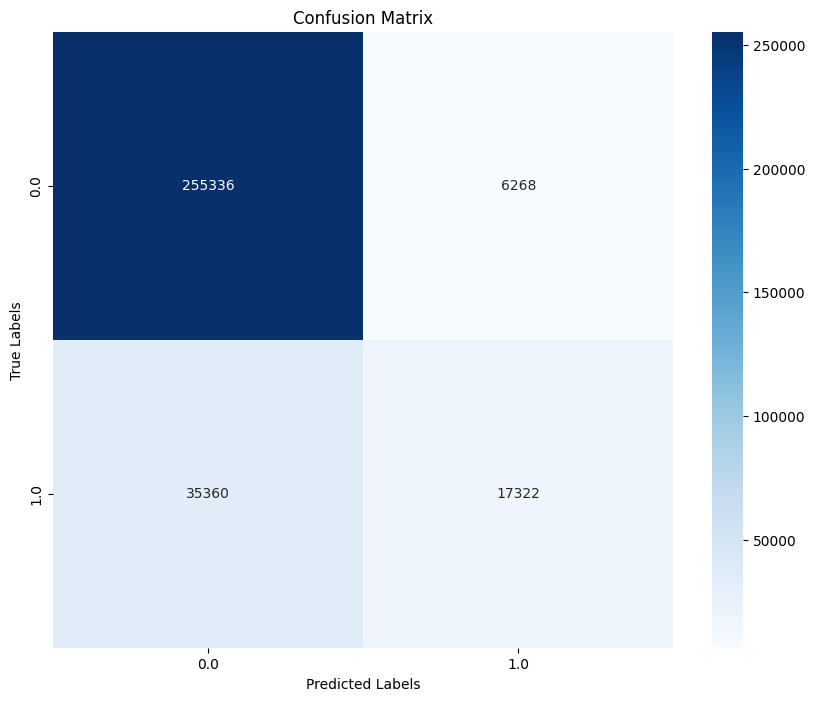

In [50]:
evaluator.plot_confusion_matrix()